Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

%matplotlib inline

In [2]:
def LeerPrecios(filename):
    for indice in range(10):
        DataFrame = pd.read_excel(filename,skiprows = indice ,usecols = list(range(25)))
        if DataFrame.iloc[0,0] == 'Fecha':
            DataFrame = pd.read_excel(filename,skiprows = indice+1, usecols = list(range(25)))
            break
    return DataFrame

In [3]:
Archivos = !ls precios/*.xls*
DataFrames = []
for filename in Archivos:
    DataFrames.append(LeerPrecios(filename))
DataFrames = pd.concat(DataFrames)
DataFrames = pd.melt(DataFrames,id_vars = 'Fecha')
DataFrames.columns = ['Fecha','Hora','Precio']

In [4]:
DataFrames.shape[0]

201816

**2.--** Compute e imprima el número de registros con datos faltantes.

In [5]:
# Esta mal!!
DataFrames.isnull().sum().sum()

454

In [6]:
df1 = DataFrames.dropna()

In [7]:
DataFrames.shape[0] - df1.shape[0]

238

**3.--** Compute e imprima el número de registros duplicados.

In [8]:
DataFrameSinRepetir = DataFrames.copy()
DataFrameSinRepetir = DataFrameSinRepetir.drop_duplicates()
TotalRepetidos =  len(DataFrames.index) - len(DataFrameSinRepetir.index)
TotalRepetidos

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [9]:
DataFrameSinRepetir = DataFrames.copy()
DataFrameSinRepetir = (DataFrameSinRepetir.drop_duplicates())
DataFrameSinRepetir = DataFrameSinRepetir.dropna()
len(DataFrameSinRepetir.index)

199819

**5.--** Compute y grafique el precio primedio diario.

In [10]:
df = DataFrames.copy()

In [11]:
df['dia'] = pd.DatetimeIndex(df['Fecha']).day
df['mes'] = pd.DatetimeIndex(df['Fecha']).month

In [12]:
df.head()

,Fecha,Hora,Precio,dia,mes
0,1995-07-20,0,NaN,20.0,7.0
1,1995-07-21,0,1.073,21.0,7.0
2,1995-07-22,0,1.073,22.0,7.0
3,1995-07-23,0,1.073,23.0,7.0
4,1995-07-24,0,1.000,24.0,7.0


In [13]:
aux = df.groupby('dia')['Precio'].mean()

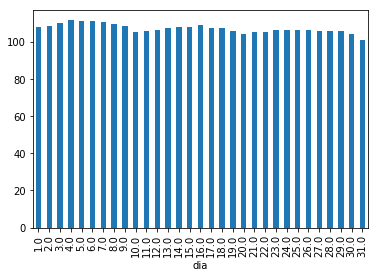

In [14]:
aux.plot(kind="bar")

**6.--** Compute y grafique el precio máximo por mes.

In [20]:
aux = df.groupby('mes')['Precio'].max()

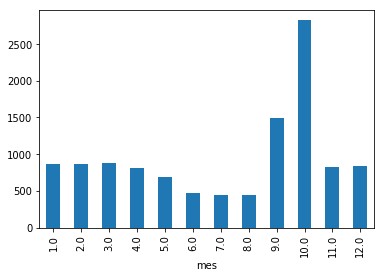

In [21]:
aux.plot(kind="bar")

**7.--** Compute y grafique el precio mínimo mensual.

In [23]:
aux = df.groupby('mes')['Precio'].min()

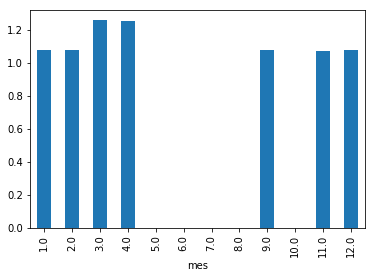

In [24]:
aux.plot(kind="bar")

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [25]:
aux = df.groupby('mes')['Precio'].max()

In [26]:
aux2 = df.groupby('mes')['Precio'].mean()

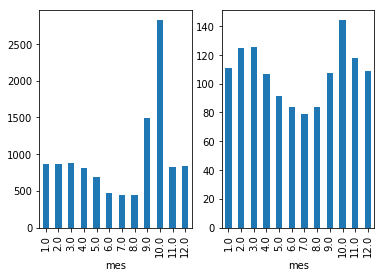

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2)
aux.plot(kind="bar", ax=axes[0])
aux2.plot(kind="bar", ax=axes[1])

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [28]:
df['dia_semana'] = [a.weekday() for a in pd.to_datetime(df['Fecha'])]

In [29]:
aux = df.copy()

In [30]:
aux = aux[aux['dia_semana'] < 5]

In [31]:
aux.head()

,Fecha,Hora,Precio,dia,mes,dia_semana
0,1995-07-20,0,NaN,20.0,7.0,3.0
1,1995-07-21,0,1.073,21.0,7.0,4.0
4,1995-07-24,0,1.000,24.0,7.0,0.0
5,1995-07-25,0,0.990,25.0,7.0,1.0
6,1995-07-26,0,0.500,26.0,7.0,2.0


In [32]:
aux2 = aux.groupby('dia_semana')['Precio'].max()

In [33]:
for i, val in enumerate(aux2):
    aux.loc[aux['dia_semana'] == i, 'maxi'] = val

In [34]:
aux.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,maxi
0,1995-07-20,0,NaN,20.0,7.0,3.0,1942.776133
1,1995-07-21,0,1.073,21.0,7.0,4.0,1948.516236
4,1995-07-24,0,1.000,24.0,7.0,0.0,2821.520551
5,1995-07-25,0,0.990,25.0,7.0,1.0,1942.706669
6,1995-07-26,0,0.500,26.0,7.0,2.0,1942.516236


In [35]:
axu3 = aux2.copy()

In [36]:
for idx, maximo in enumerate(aux2):
    print(idx,maximo)

0 2821.520551
1 1942.706669
2 1942.516236
3 1942.776133
4 1948.516236


In [37]:
aux2.head()

dia_semana
0.0    2821.520551
1.0    1942.706669
2.0    1942.516236
3.0    1942.776133
4.0    1948.516236
Name: Precio, dtype: float64

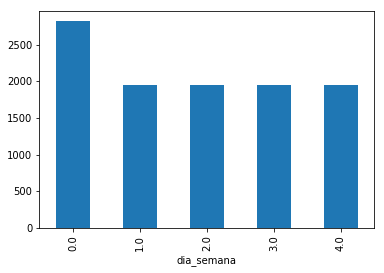

In [38]:
aux2.plot(kind="bar")

In [39]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
ListaDeDiasHabiles = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
DataFramePorDiasLaborarles = DatosPorDia[(DatosPorDia['Dia'] == 'Monday') | (DatosPorDia['Dia'] == 'Tuesday')| (DatosPorDia['Dia'] == 'Wednesday')| (DatosPorDia['Dia'] == 'Thursday')| (DatosPorDia['Dia'] == 'Friday')]
DataFrameAgrupadoPorFecha = DataFramePorDiasLaborarles.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiasLaborarles, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')


Text(0, 0.5, 'Numero de ocurrencias')

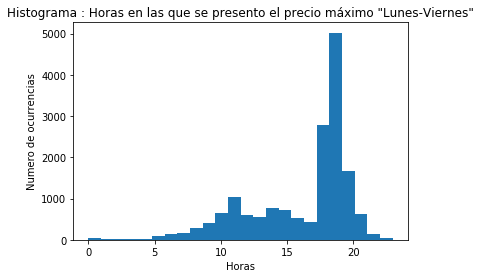

In [40]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Lunes-Viernes"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [41]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaSabado = DatosPorDia[(DatosPorDia['Dia'] == 'Saturday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaSabado.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaSabado, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

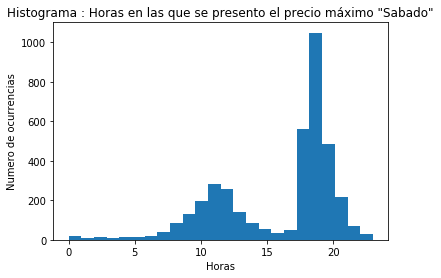

In [42]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Sabado"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [44]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaDomingo = DatosPorDia[(DatosPorDia['Dia'] == 'Sunday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaDomingo.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaDomingo, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

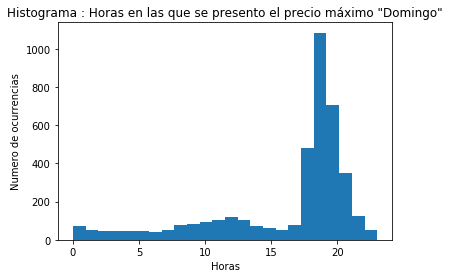

In [45]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Domingo"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [46]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Year'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DataFrameAgrupadoPorFecha = DatosPorDia.groupby('Year').agg({'Precio': np.min}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFrameAgrupadoPorFecha.columns = ["Year","MinPrecio"]
DataFramesMerge = pd.merge(DataFrameAgrupadoPorFecha, DatosPorDia, on = ['Year'], how ='inner')
DataFramesMerge = DataFramesMerge[(DataFramesMerge['MinPrecio'] == DataFramesMerge['Precio'])]
print(DataFramesMerge[['Fecha','MinPrecio']].drop_duplicates())

            Fecha  MinPrecio
7      1995-07-28   0.000000
10     1995-07-31   0.000000
11     1995-08-01   0.000000
84     1995-10-13   0.000000
338    1995-07-29   0.000000
339    1995-07-30   0.000000
3800   1995-07-26   0.000000
4140   1996-06-30   0.000000
4149   1996-07-09   0.000000
4152   1996-07-12   0.000000
4162   1996-07-22   0.000000
4163   1996-07-23   0.000000
4164   1996-07-24   0.000000
4876   1996-07-04   0.000000
5981   1996-07-11   0.000000
7749   1996-05-10   0.000000
9651   1996-07-21   0.000000
12566  1996-07-08   0.000000
13668  1997-07-15  10.882310
21695  1998-07-12  13.847330
21696  1998-07-13  13.847330
21697  1998-07-14  13.847330
21698  1998-07-15  13.847330
21699  1998-07-16  13.847330
21701  1998-07-18  13.847330
21702  1998-07-19  13.847330
21703  1998-07-20  13.847330
21704  1998-07-21  13.847330
21705  1998-07-22  13.847330
21706  1998-07-23  13.847330
...           ...        ...
32539  1999-03-28  18.359530
37652  1999-03-31  18.359530
41303  2000-03

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [47]:
DatosPorMesPromedio = DataFrameSinRepetir.copy()
DatosPorMesPromedio['Fecha'] = pd.to_datetime(DatosPorMesPromedio['Fecha'])
DatosPorMesPromedio['Mes'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesPromedio['year'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DatosPorMesYear = DatosPorMesPromedio.groupby(['Mes','year']).agg({'Precio': np.mean}) 
DatosPorMesYear.reset_index(inplace=True)
DatosPorMesYear.columns = ['Mes','year','PromedioPorMes']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')

DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia = DatosPorDia.groupby('Fecha').agg({'Precio': np.mean}) 
DatosPorDia.reset_index(inplace=True)
DatosPorDia.columns = ['Fecha','PrecioPorDia']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')
DataFramesMerge = pd.merge(DataFramesMerge, DatosPorDia, on = ['Fecha'], how ='inner')
DataFrameHaGraficar = DataFramesMerge.groupby('Fecha').agg({'PrecioPorDia': np.mean,'PromedioPorMes': np.mean}) 


<Figure size 1440x1440 with 0 Axes>

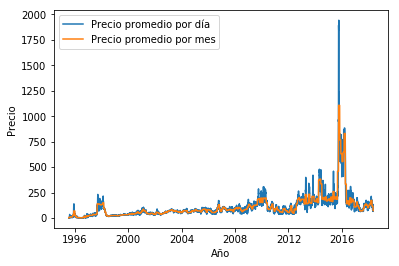

In [48]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PrecioPorDia'], label="Precio promedio por día")
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PromedioPorMes'], label="Precio promedio por mes")
plt.xlabel("Año")
plt.ylabel("Precio")

ax.legend()


---